In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import os

In [3]:
df = pd.read_csv('Retail_Sales_Data/Official_Merged_SF.csv')


In [4]:
df

,sale_date,store,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,unemployment,isholiday,dept,weekly_sales
0,2012-09-28,16,51.40,3.789,2130.57,3.82,NaN,583.90,1409.43,6.061,False,27,836.65
1,2012-10-19,16,40.59,3.750,1278.03,NaN,1.16,16.38,1395.48,5.847,False,27,852.81
2,2012-10-26,16,40.99,3.686,2285.52,20.48,NaN,201.97,1237.41,5.847,False,27,815.95
3,2010-02-19,16,21.13,2.550,NaN,NaN,NaN,NaN,NaN,7.039,False,28,266.00
4,2010-02-26,16,18.12,2.586,NaN,NaN,NaN,NaN,NaN,7.039,False,28,255.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
565963,2012-08-17,16,62.07,3.545,408.10,NaN,1.10,870.38,604.80,6.061,False,27,752.11
565964,2012-08-24,16,61.44,3.558,1556.47,16.00,3.34,869.05,1691.12,6.061,False,27,703.94
565965,2012-08-31,16,64.19,3.556,8702.40,NaN,35.78,3576.08,4493.67,6.061,False,27,614.79
565966,2012-09-14,16,56.69,3.659,5323.84,NaN,9.30,1307.03,4474.84,6.061,False,27,898.63


In [5]:
df.shape

(565968, 13)

In [6]:
# Dropping the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Dropping the null rows
df = df.dropna()
df.head()
#Getting rid of space on FALSE_POSITIVES
df.replace(to_replace ="FALSE POSITIVE", 
                 value ="FALSE_POSITIVE",
          inplace=True)

In [7]:
df

,sale_date,store,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,unemployment,isholiday,dept,weekly_sales
62,2011-11-11,16,29.56,3.505,5042.40,2193.04,200.11,3309.98,2743.18,6.232,False,28,468.42
63,2011-11-18,16,31.73,3.479,2089.46,154.21,3.55,830.60,4425.07,6.232,False,28,279.22
64,2011-11-25,16,31.39,3.424,90.28,126.47,34754.69,24.64,1560.32,6.232,True,28,349.09
66,2011-12-23,16,20.79,3.173,485.00,0.18,475.60,16.20,960.85,6.232,False,28,575.78
67,2011-12-30,16,23.91,3.119,921.67,11778.68,101.87,272.51,1673.25,6.232,True,28,685.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...
565957,2012-06-15,16,65.36,3.723,7027.33,141.80,125.91,642.76,1980.96,6.169,False,27,909.28
565958,2012-06-22,16,70.41,3.735,1291.33,201.00,0.27,696.47,1682.13,6.169,False,27,929.01
565960,2012-07-13,16,70.29,3.613,2375.53,17.90,2.07,983.30,1834.23,6.061,False,27,952.86
565961,2012-07-20,16,68.43,3.585,1115.42,105.35,4.69,196.54,948.69,6.061,False,27,799.20


In [8]:
#drop other unnecesary columns 
df.drop(inplace= True,columns=['temperature', 'fuel_price', 'store','unemployment','dept'])


In [9]:
df.shape

(149916, 8)

In [10]:
#Sort Values by date
df.sort_values(by='sale_date', inplace= True) 

In [11]:
df

,sale_date,markdown1,markdown2,markdown3,markdown4,markdown5,isholiday,weekly_sales
62,2011-11-11,5042.40,2193.04,200.11,3309.98,2743.18,False,468.42
147533,2011-11-11,10215.77,4613.06,191.71,3200.57,4230.85,False,24848.39
363402,2011-11-11,22860.64,12223.82,343.77,20834.37,9895.33,False,10305.28
147629,2011-11-11,10215.77,4613.06,191.71,3200.57,4230.85,False,23011.67
147725,2011-11-11,10215.77,4613.06,191.71,3200.57,4230.85,False,4116.93
...,...,...,...,...,...,...,...,...
176418,2012-10-26,4018.91,58.08,100.00,211.94,858.33,False,1350.87
67738,2012-10-26,1827.16,35.87,50.00,478.93,2088.65,False,5347.21
383056,2012-10-26,10768.84,50.54,104.50,345.37,6629.51,False,137.84
67546,2012-10-26,1827.16,35.87,50.00,478.93,2088.65,False,497.03


In [12]:
#use conditional to locate all rows after November 4th 2011
new_df= df.loc[df["sale_date"]> "2011-11-04" ]

In [13]:
new_df

,sale_date,markdown1,markdown2,markdown3,markdown4,markdown5,isholiday,weekly_sales
62,2011-11-11,5042.40,2193.04,200.11,3309.98,2743.18,False,468.42
147533,2011-11-11,10215.77,4613.06,191.71,3200.57,4230.85,False,24848.39
363402,2011-11-11,22860.64,12223.82,343.77,20834.37,9895.33,False,10305.28
147629,2011-11-11,10215.77,4613.06,191.71,3200.57,4230.85,False,23011.67
147725,2011-11-11,10215.77,4613.06,191.71,3200.57,4230.85,False,4116.93
...,...,...,...,...,...,...,...,...
176418,2012-10-26,4018.91,58.08,100.00,211.94,858.33,False,1350.87
67738,2012-10-26,1827.16,35.87,50.00,478.93,2088.65,False,5347.21
383056,2012-10-26,10768.84,50.54,104.50,345.37,6629.51,False,137.84
67546,2012-10-26,1827.16,35.87,50.00,478.93,2088.65,False,497.03


In [14]:
# Get average of markdowns1-5 DataFrame rows (selected by index labels)
new_df['markdownmean']= new_df[[ 'markdown1', 'markdown2', 'markdown3','markdown4','markdown5'] ].mean(axis=1)


In [15]:
new_df.head()

,sale_date,markdown1,markdown2,markdown3,markdown4,markdown5,isholiday,weekly_sales,markdownmean
62,2011-11-11,5042.40,2193.04,200.11,3309.98,2743.18,False,468.42,2697.742
147533,2011-11-11,10215.77,4613.06,191.71,3200.57,4230.85,False,24848.39,4490.392
363402,2011-11-11,22860.64,12223.82,343.77,20834.37,9895.33,False,10305.28,13231.586
147629,2011-11-11,10215.77,4613.06,191.71,3200.57,4230.85,False,23011.67,4490.392
147725,2011-11-11,10215.77,4613.06,191.71,3200.57,4230.85,False,4116.93,4490.392


In [16]:
#Selecting wanted columns
freshy= new_df [['sale_date', 'markdownmean','weekly_sales','isholiday']] 


In [17]:
freshy.head()

,sale_date,markdownmean,weekly_sales,isholiday
62,2011-11-11,2697.742,468.42,False
147533,2011-11-11,4490.392,24848.39,False
363402,2011-11-11,13231.586,10305.28,False
147629,2011-11-11,4490.392,23011.67,False
147725,2011-11-11,4490.392,4116.93,False


In [18]:
# Set features. This will also be used as your x values.
#X values are my independent variables 
X= freshy[['isholiday','sale_date','markdownmean']]
# Y is my Dependent variable
y= freshy[['weekly_sales']]
print(X.shape, y.shape)

(149916, 3) (149916, 1)


In [19]:
#Label Encoding simply encodes each category as an integer value. 
#Sklearn provides a preprocessing library to assist with this.
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

data = X.copy()

label_encoder.fit(data["isholiday"])
label_encoder.classes_

array([False,  True])

In [20]:
label_encoder.transform(data.isholiday) 

array([0, 0, 0, ..., 0, 0, 0])

In [21]:
#Splitting
from sklearn.model_selection import train_test_split

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.head()

,isholiday,markdownmean,sale_date_2011-11-11,sale_date_2011-11-18,sale_date_2011-11-25,sale_date_2011-12-16,sale_date_2011-12-23,sale_date_2011-12-30,sale_date_2012-01-06,sale_date_2012-01-13,...,sale_date_2012-07-13,sale_date_2012-07-20,sale_date_2012-07-27,sale_date_2012-08-17,sale_date_2012-08-24,sale_date_2012-08-31,sale_date_2012-09-14,sale_date_2012-09-21,sale_date_2012-09-28,sale_date_2012-10-26
50266,False,5600.628,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
72067,False,2193.854,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
177940,False,9751.822,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
327750,False,2656.614,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
516125,False,3060.938,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
#Min max scaler
from sklearn.preprocessing import MinMaxScaler
X_minmax = MinMaxScaler().fit(X_train)
y_minmax = MinMaxScaler().fit(y_train)

X_train_minmax = X_minmax.transform(X_train)
X_test_minmax = X_minmax.transform(X_test)
y_train_minmax = y_minmax.transform(y_train)
y_test_minmax = y_minmax.transform(y_test)

In [23]:
X.shape

(149916, 38)

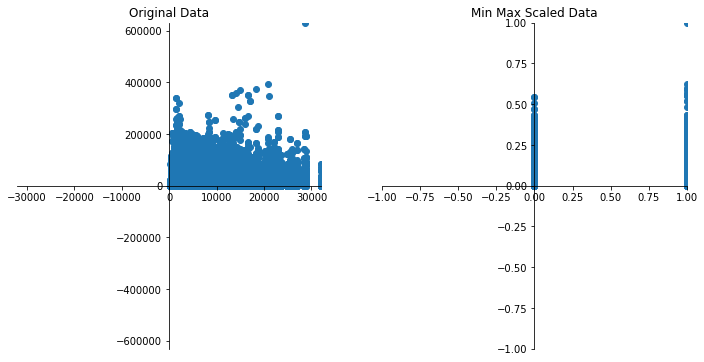

In [24]:
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Min Max Scaled Data")

maxx = X_train["markdownmean"].max()
maxy = y_train.max()[0]
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim( -maxy -1, maxy + 1)

axes2.set_xlim(-1, 1)
axes2.set_ylim(-1, 1)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train['markdownmean'], y_train)
axes2.scatter(X_train_minmax[:,0], y_train_minmax[:])